# Day 14: Restroom Redoubt

One of The Historians needs to use the bathroom; fortunately, you know there's a bathroom near an unvisited location on their list, and so you're all quickly teleported directly to the lobby of **Easter Bunny Headquarters**.

Unfortunately, EBHQ seems to have "improved" bathroom security again after your last visit. The area outside the bathroom is swarming with robots!

To get The Historian safely to the bathroom, you'll need a way to predict where the robots will be in the future. Fortunately, they all seem to be moving on the tile floor in predictable straight lines.

You make a list (your puzzle input) of all of the robots' current positions (`p`) and velocities (`v`), one robot per line. For example:

```
p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3
```

Each robot's position is given as `p=x,y` where:
- `x` represents the number of tiles the robot is from the left wall.
- `y` represents the number of tiles from the top wall (when viewed from above). 
  - For example, a position of `p=0,0` means the robot is in the top-left corner.

Each robot's velocity is given as `v=x,y` where:
- Positive `x` means the robot moves to the right.
- Positive `y` means the robot moves down. 
  - For instance, a velocity of `v=1,-2` means the robot moves 1 tile to the right and 2 tiles up every second.

The robots outside the actual bathroom are in a space **101 tiles wide** and **103 tiles tall** (when viewed from above). However, in this example, the robots are in a space **11 tiles wide** and **7 tiles tall**.

The robots are good at navigating over/under each other (due to a combination of springs, extendable legs, and quadcopters), so they can share the same tile and don't interact with each other. Visually, the number of robots on each tile in this example looks like this:

```
1.12.......
...........
...........
......11.11
1.1........
.........1.
.......1...
```

### Teleporting Robots
These robots have a unique feature for maximum bathroom security: they can teleport. When a robot would run into an edge of the space, they instead **teleport to the other side**, effectively wrapping around the edges. 

For example, robot `p=2,4 v=2,-3` behaves as follows:

**Initial state:**
```
...........
...........
...........
...........
..1........
...........
...........
```

**After 1 second:**
```
...........
....1......
...........
...........
...........
...........
...........
```

**After 2 seconds:**
```
...........
...........
...........
...........
...........
......1....
...........
```

**After 3 seconds:**
```
...........
...........
........1..
...........
...........
...........
...........
```

**After 4 seconds:**
```
...........
...........
...........
...........
...........
...........
..........1
```

**After 5 seconds:**
```
...........
...........
...........
.1.........
...........
...........
...........
```

### The Task
The Historian can't wait much longer, so you don't have to simulate the robots for very long. **Where will the robots be after 100 seconds?**

In the above example, the number of robots on each tile after 100 seconds has elapsed looks like this:

```
......2..1.
...........
1..........
.11........
.....1.....
...12......
.1....1....
```

To determine the safest area, count the number of robots in each **quadrant** after 100 seconds. Robots that are exactly in the middle (horizontally or vertically) don't count as being in any quadrant, so the only relevant robots are:

```
Quadrant 1: 2 robots
Quadrant 2: 3 robots
Quadrant 3: 4 robots
Quadrant 4: 1 robot
```

Multiplying these together gives a total safety factor of `2 * 3 * 4 * 1 = 12`.

---

### Final Challenge
Predict the motion of the robots in your list within a space **101 tiles wide** and **103 tiles tall**. What will the **safety factor** be after exactly 100 seconds?

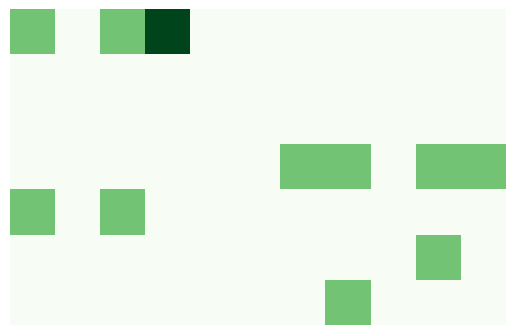

In [1]:
import re
from dataclasses import dataclass, field
import numpy as np
import matplotlib.pyplot as plt


@dataclass
class Robot:
    position: tuple[int, int]
    velocity: tuple[int, int]

    def step(self, width: int, height: int) -> tuple[int, int]:
        self.position = tuple(np.add(self.position, self.velocity))
        self.position = tuple(np.mod(self.position, (width, height)))
        return self.position

    @classmethod
    def from_string(cls, s: str) -> "Robot":
        # p=0,4 v=3,-3 -> Robot(position=(0, 4), velocity=(3, -3))
        pattern = r"p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)"
        match = re.match(pattern, s)
        if not match:
            raise ValueError(f"Invalid robot string: {s}")
        x, y, vx, vy = map(int, match.groups())
        return cls(position=(x, y), velocity=(vx, vy))


def load_robots(filename: str) -> list[Robot]:
    with open(filename, "r") as f:
        return [Robot.from_string(line) for line in f.readlines()]


@dataclass
class Grid:
    width: int
    height: int
    grid: np.ndarray = field(init=False)

    def __post_init__(self):
        self.grid = np.zeros((self.height, self.width), dtype=int)

    def _clear_map(self):
        self.grid = np.zeros((self.height, self.width), dtype=int)

    def add_robot(self, robot: Robot):
        self.grid[robot.position[1], robot.position[0]] += 1

    def add_robots(self, robots: list[Robot]):
        self._clear_map()
        for robot in robots:
            self.add_robot(robot)

    def quadrant_counts(self):
        return {
            1: np.sum(self.grid[: self.height // 2, : self.width // 2]),
            2: np.sum(self.grid[: self.height // 2, self.width // 2 + 1 :]),
            3: np.sum(self.grid[self.height // 2 + 1 :, : self.width // 2]),
            4: np.sum(self.grid[self.height // 2 + 1 :, self.width // 2 + 1 :]),
        }

    def multiply_quadrant_counts(self):
        return np.prod(list(self.quadrant_counts().values()))

    def draw(self, title: str = ""):
        plt.imshow(self.grid, cmap="Greens")
        plt.axis("off")
        plt.title(title)
        plt.show()


robots = load_robots("example.txt")
grid = Grid(width=11, height=7)
grid.add_robots(robots)
grid.draw()

Quadrant counts: {1: 1, 2: 3, 3: 4, 4: 1}
Safety factor: 12


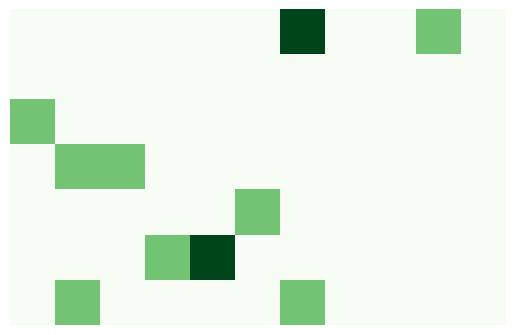

In [2]:
grid = Grid(width=11, height=7)
seconds = 100
for _ in range(seconds):
    for robot in robots:
        robot.step(grid.width, grid.height)

grid.add_robots(robots)
print(f"Quadrant counts: {grid.quadrant_counts()}")
print(f"Safety factor: {grid.multiply_quadrant_counts()}")
grid.draw()

Quadrant counts: {1: 117, 2: 129, 3: 111, 4: 132}
Safety factor: 221142636


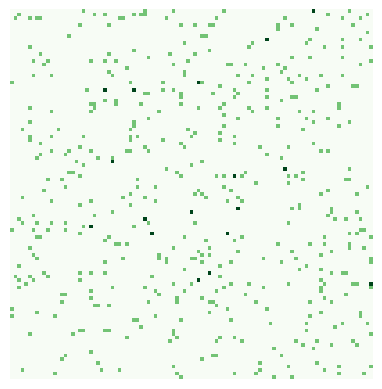

In [3]:
robots = load_robots("input.txt")
grid = Grid(width=101, height=103)
seconds = 100

for _ in range(seconds):
    for robot in robots:
        robot.step(grid.width, grid.height)

grid.add_robots(robots)
print(f"Quadrant counts: {grid.quadrant_counts()}")
print(f"Safety factor: {grid.multiply_quadrant_counts()}")
grid.draw()

# Part Two

During the bathroom break, someone notices that these robots seem awfully similar to ones built and used at the North Pole. If they're the same type of robots, they should have a hard-coded Easter egg: very rarely, most of the robots should arrange themselves into a picture of a **Christmas tree**.

**What is the fewest number of seconds that must elapse for the robots to display the Easter egg?**

In [4]:
from typing import Callable
from tqdm.auto import tqdm


@dataclass
class SymmetryScore:
    seconds_elapsed: int
    score: float
    grid: np.ndarray


def simulate_robots(
    robots: list[Robot],
    grid: Grid,
    steps: int,
    easter_egg_fn: Callable[[np.ndarray], float],
) -> list[SymmetryScore]:
    """Simulate robot movements and calculate symmetry scores."""
    scores = np.empty(steps, dtype=SymmetryScore)
    max_score = 0
    pbar = tqdm(range(steps), desc=f"Max score: {max_score}@0")

    for step in pbar:
        # Move robots and update grid
        for robot in robots:
            robot.step(grid.width, grid.height)
        grid.add_robots(robots)
        score = easter_egg_fn(grid.grid)

        scores[step] = SymmetryScore(seconds_elapsed=step + 1, score=score, grid=grid.grid.copy())
        if score > max_score:
            max_score = score
            pbar.set_description(f"Max score: {max_score}@{step + 1}")

    return scores

Max score: 0@0:   0%|          | 0/10000 [00:00<?, ?it/s]

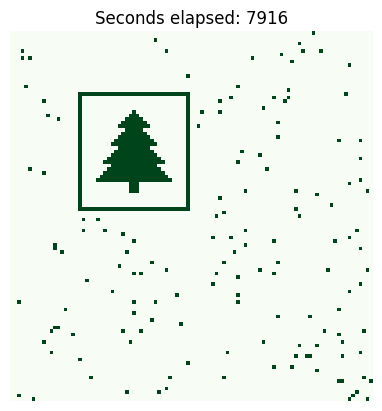

In [5]:
import cv2 

def get_biggest_connected_component(
    grid: np.ndarray,
) -> int:
    """
    Find connected components in a binary grid and sort them by area.

    Args:
        grid (np.ndarray): Binary grid where 1s represent the foreground.

    Returns:
        int: Area of the largest connected component.
    """
    # Ensure the grid is binary (0s and 1s)
    binary_grid = (grid > 0).astype(np.uint8)

    # Get connected components
    num_labels, _, stats, centroids = cv2.connectedComponentsWithStats(
        binary_grid, connectivity=8
    )

    # Get the areas of all components except background (label 0)
    areas = [stats[label, cv2.CC_STAT_AREA] for label in range(1, num_labels)]
    
    # Return the largest area if any components exist, otherwise 0
    return max(areas) if areas else 0

robots = load_robots("input.txt")
grid = Grid(width=101, height=103)

scores = simulate_robots(robots, grid, steps=10000, easter_egg_fn=get_biggest_connected_component)
sorted_scores = sorted(scores, key=lambda x: x.score, reverse=True)
plt.imshow(sorted_scores[0].grid, cmap="Greens")
plt.title(f"Seconds elapsed: {sorted_scores[0].seconds_elapsed}")
plt.axis("off")
plt.show()

Max score: 0@0:   0%|          | 0/10000 [00:00<?, ?it/s]

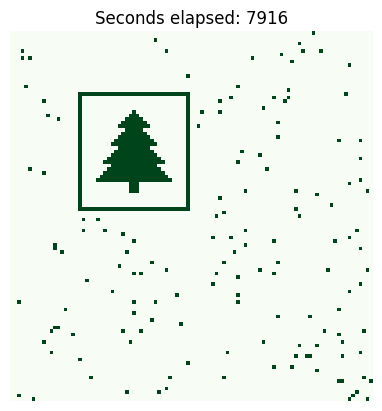

In [6]:
def calculate_symmetry_score(
    grid: np.ndarray, verbose: bool = False
) -> int:
    """
    Calculate the best vertical symmetry score for a grid using a sliding window.

    Args:
        grid (np.ndarray): Input 2D grid (binary or numeric).
        verbose (bool): If True, visualize the best division.

    Returns:
        int: The largest area of a connected component.
    """

    _, width = grid.shape
    best_score = 0

    for division_point in range(1, width):
        # Determine the maximum valid width for halves
        max_width = min(division_point, width - division_point)

        # Extract equal-sized left and right halves
        left_half = grid[:, :max_width]
        right_half = grid[:, division_point:division_point + max_width][:, ::-1]

        # Calculate the symmetry score
        score = np.sum((left_half > 0) & (right_half > 0))

        # Update best score and division if necessary
        if score > best_score:
            best_score = score

            if verbose:
                print(f"Division {division_point}: Best Score {best_score}")
                # Visualize the halves
                fig, axes = plt.subplots(1, 2, figsize=(10, 4))
                for ax, half, title in zip(
                    axes, [left_half, right_half], ["Left Half", "Right Half (Flipped)"]
                ):
                    ax.imshow(half, cmap="Greens")
                    ax.axis("off")
                    ax.set_title(title)
                plt.show()

    return best_score

robots = load_robots("input.txt")
grid = Grid(width=101, height=103)

scores = simulate_robots(robots, grid, steps=10000, easter_egg_fn=calculate_symmetry_score)
sorted_scores = sorted(scores, key=lambda x: x.score, reverse=True)
plt.imshow(sorted_scores[0].grid, cmap="Greens")
plt.title(f"Seconds elapsed: {sorted_scores[0].seconds_elapsed}")
plt.axis("off")
plt.show()